<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/InterestRates200s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [7]:
start, end = dt.datetime(2002, 1, 1), dt.datetime(2010, 12, 31)

# Federal Funds Rate (Effective)
fedfunds = web.DataReader("FEDFUNDS", "fred", start, end)

# 10-Year Treasury Constant Maturity
gs10 = web.DataReader("GS10", "fred", start, end)

# Merge into one DataFrame
rates = fedfunds.join(gs10, how="inner")
rates.rename(columns={"FEDFUNDS": "Fed Funds Rate", "GS10": "10Y Treasury"}, inplace=True)

print(rates.head())

            Fed Funds Rate  10Y Treasury
DATE                                    
2002-01-01            1.73          5.04
2002-02-01            1.74          4.91
2002-03-01            1.73          5.28
2002-04-01            1.75          5.21
2002-05-01            1.75          5.16


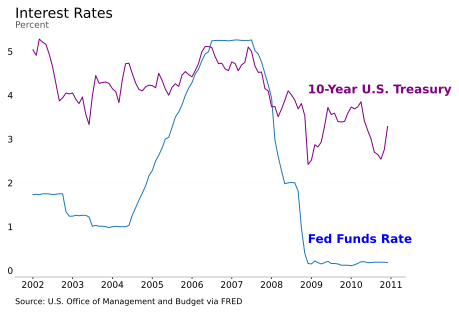

In [17]:
x, y = rates.index, rates['Fed Funds Rate']

# --- NYT-style colors ---
line_color     = "#1f77b4"  # medium/light blue (main line)
fill_color     = "#e6f1fb"  # very pale blue fill
forecast_fill  = "#99c2e6"  # medium sky blue for forecast shading
grid_color     = "#f7fbff"  # nearly white with a blue tint for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(rates.index, rates['10Y Treasury'], color='purple', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Interest Rates', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Office of Management and Budget via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

ax.annotate("10-Year U.S. Treasury",
        xy = (0.75, 0.75),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color='purple')

ax.annotate("Fed Funds Rate",
        xy = (0.75, 0.15),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color='blue')


fig.savefig("interst_rates2000s.png", bbox_inches="tight", dpi=300)
plt.show()